# Predictive Analysis : Prediksi Penyakit Jantung

Nama : Nisrina Fatimah Parisya


ID Cohort :MC006D5X1393

## Data  Loading

Pada tahapan pertama, saya mengambil dataset dari website Kaggle dengan nama ***common heart disease data 4 hospital*** dan menggunakan library pandas serta menggunakan fungsi` read_csv()` untuk mengunggah dataset yang akan di proses.

Dataset ini terdiri dari 920 baris dan 14 kolom dimana 13 kolom tersebut memiliki tipe data float , 1 kolom integer dan 1 kolom kategorikal.

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denysskyrda/common-heart-disease-data-4-hospitals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/common-heart-disease-data-4-hospitals


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [27]:
df = pd.read_csv("/kaggle/input/common-heart-disease-data-4-hospitals/heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,1.6,7.0,1,switzerland
916,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,0.8,7.0,1,switzerland
917,72.0,1.0,3.0,160.0,0.0,0.2,2.0,114.0,0.0,1.6,2.0,2.0,6.2,0,switzerland
918,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,1.0,3.0,1,switzerland


## Data Undertanding

Dataset yang digunakan merupakan dataset berjudul "Common Heart Disease (4 Hospitals)  yang dapat diakses melalui kaggle dengan link berikut ini [Common Heart Disease Dataset]( https://www.kaggle.com/datasets/denysskyrda/common-heart-disease-data-4-hospitals). Dataset ini terdiri dari 920 Baris dengan data pasien dengan parameter berupa variabel yang relevan dengan penyakit jantung.

###### Cek ukuran data

Tahapan ini dilakukan untuk memahami isi dataset. hal pertama yang dilakukan adalah memahami dan mengecek isi dari dataset dengan menggunakan `.shape', .info() `dan `.describe()`









In [28]:
df.shape

(920, 15)

Dalam Cell diatas ini dapat kita ketahui bahwa dataset terdiri dari 920 barus data dengan 15 kolom

##### Cek Informasi Data

berdasarkan output tersebut kita dapat mengetahui ada beberapa jenis data


*   12 Kolom dengan tipe data float dengan kategori numerik untuk kolom age, sex, cp, trestbos,chil,cfbs,resrecgh,thalach,exang,oldpeak,slope,ca,thal
*   1 Kolom integer untuk label target dengan nama kolom target yang didalamnya terdapat angka 0 yang artinya pasien tidak memiliki tanda tanda penyakit jantung dan angka 1 yang artinya pasien memiliki tanda tanda penyakit jantung
* 1 Kolom kategorikal dengan data berupa nama rumah sakit dimana data tersebut diambil. Namun karena disini saya berfokus pada prediksi penyakitnya kolom tersebut akan saya hapus

Disini saya akan menerjemahkan terkait dengan apa saja parameter yang terdapat pada setiap kolom dataset

*   age – Usia pasien
*   sex – Jenis kelamin (1 = laki-laki, 0 = perempuan)
* cp – Jenis nyeri dada
* trestbps – Tekanan darah saat istirahat
* chol – Kadar kolesterol dalam darah (mg/dl)
* fbs – Gula darah puasa > 120 mg/dl (1 = ya, 0 = tidak)
* restecg – Hasil elektrokardiogram saat istirahat
* thalach – Detak jantung maksimum yang dicapai
* exang – Angina (nyeri dada) yang dipicu oleh olahraga (1 = ya, 0 = tidak)
* oldpeak – Depresi segmen ST (nilai positif, dibulatkan)
* slope – Kemiringan segmen ST saat latihan
* ca – Jumlah pembuluh darah utama yang terlihat melalui fluoroskopi
* thal – Hasil tes thalassemia
* target – Kehadiran penyakit jantung (1 = ada penyakit, 0 = tidak ada penyakit)





In [29]:
# Melihat info dataset untuk mengetahui tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   restecg   920 non-null    float64
 7   thalach   920 non-null    float64
 8   exang     920 non-null    float64
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    float64
 11  ca        920 non-null    float64
 12  thal      920 non-null    float64
 13  target    920 non-null    int64  
 14  source    920 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 107.9+ KB


###### Cek Statistik Deskriptif Dataset

pada df.describe() disini kita dapat mengecek isi data secara statistik deskriptif dan menganalisis apakah ada kemungkinan kesalahan data. dari iyang kita lihat diatas ada beberapa kemungkinan data yang mengalami outlier diantaranya


*   trestbps (tekanan darah) : alasannya karena tekanan darah di nilai 0 pada kolom min sangat tidak normal dalam medis
*   chol (kolesterol) : alasannya karena kolesterol berada di nilai 0 pada kolom min sangat tidak normal dalam medis



In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,132.268478,199.640870,0.176304,0.604348,136.889565,0.394783,0.910478,1.757609,0.778913,5.371522,0.553261
std,9.424685,0.408148,0.930969,18.569153,109.240114,0.357484,0.804978,25.438033,0.477178,1.039830,0.539280,0.667765,1.508660,0.497426
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,177.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.200000,0.200000,3.800000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,0.800000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.200000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


#### Cek Missing Value

pada tahapan ini kita dapat melakukan pengecekan missing value dalam dataset tersebut diantaranya menggunakan funsgi .`isnull().sum()` untuk mengetahui missing value di setiap kolom

In [31]:
# Jumlah nilai yang hilang per kolom
missing_values = df.isnull().sum()
print("Cek Missing Value:")
print(missing_values)

Cek Missing Value:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
source      0
dtype: int64


Berdasarkan output diatas tidak ditemukan adanya missing value, maka dari itu kita tidak perlu melakukan eksekusi drop atau mengisi nilai NaN pada data karena semua data terisi dengan baik

#### Pengecekan Outlier

Berdasarkan hasil statistik deskriptif sebelumnya saya merasa ada beberapa outliers yang harus ditangani. pada proses ini saya mengganti nilai outlier dengan metode *IQR+Median Replacement* agar tidak mengurangi data secara ekstrim

=== PENGECEKAN OUTLIER ===

Statistik deskriptif sebelum penanganan outlier:
         trestbps        chol
count  920.000000  920.000000
mean   132.268478  199.640870
std     18.569153  109.240114
min      0.000000    0.000000
25%    120.000000  177.000000
50%    130.000000  223.000000
75%    140.000000  267.000000
max    200.000000  603.000000

--- TRESTBPS ---
Q1: 120.00
Q3: 140.00
IQR: 20.00
Batas bawah: 90.00
Batas atas: 170.00
Jumlah outlier: 28
Persentase outlier: 3.04%
Nilai outlier: [np.float64(0.0), np.float64(80.0), np.float64(172.0), np.float64(172.0), np.float64(174.0), np.float64(178.0), np.float64(178.0), np.float64(178.0), np.float64(180.0), np.float64(180.0), np.float64(180.0), np.float64(180.0), np.float64(180.0), np.float64(180.0), np.float64(180.0), np.float64(180.0), np.float64(180.0), np.float64(180.0), np.float64(180.0), np.float64(180.0), np.float64(185.0), np.float64(190.0), np.float64(190.0), np.float64(192.0), np.float64(200.0), np.float64(200.0), np.float64(2

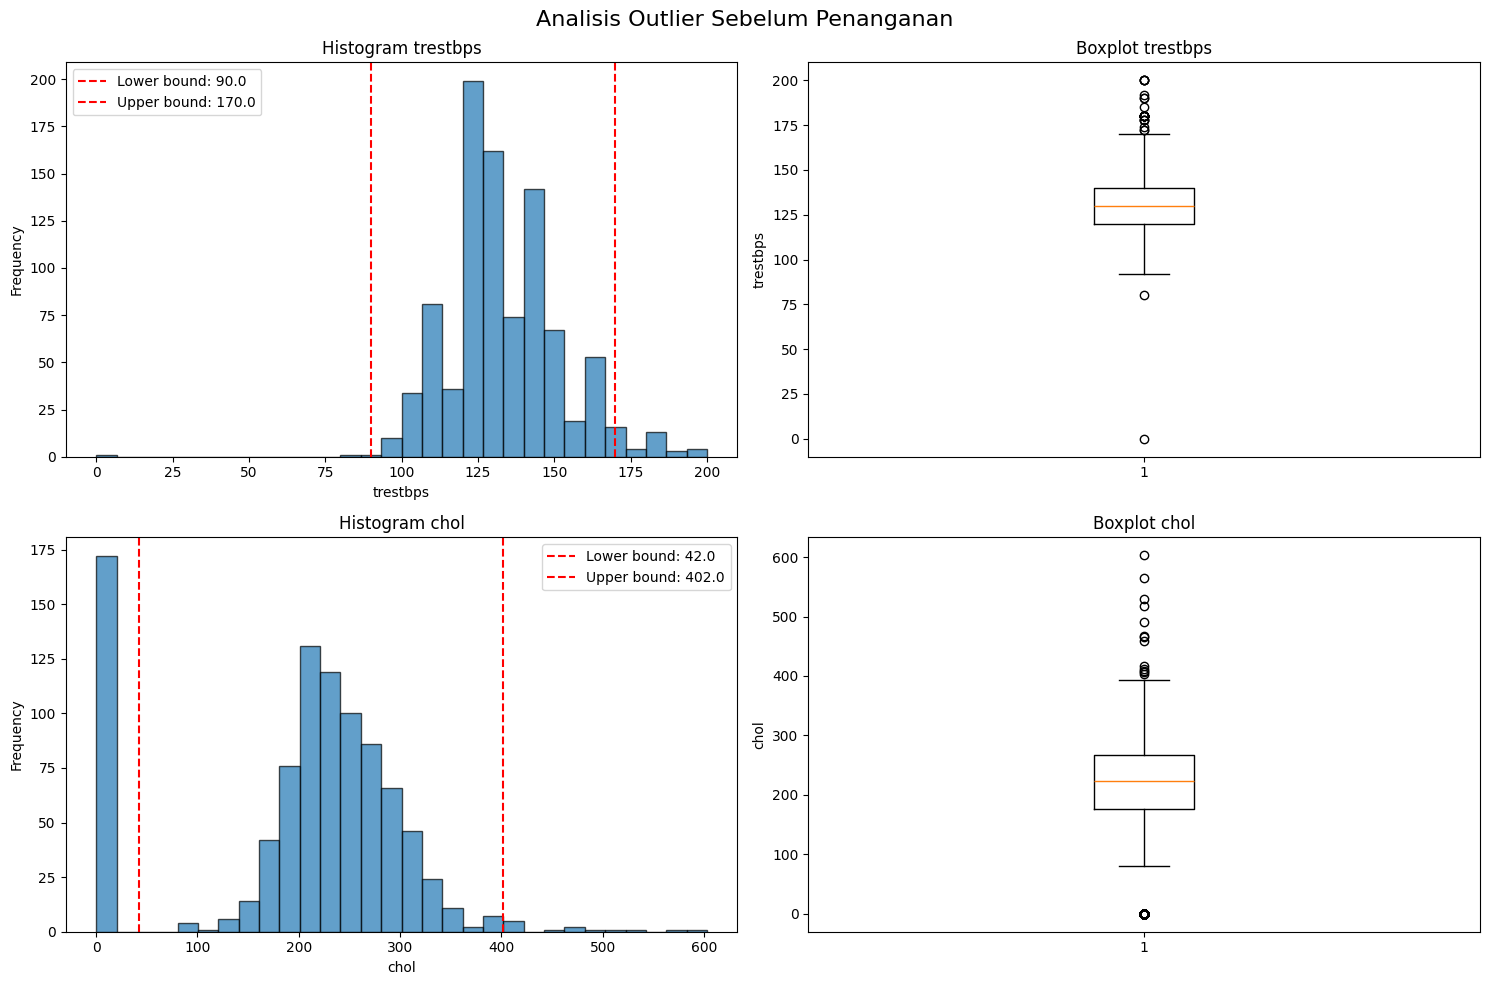

In [32]:
outlier_cols = ['trestbps', 'chol']

print("=== PENGECEKAN OUTLIER ===")
print("\nStatistik deskriptif sebelum penanganan outlier:")
print(df[outlier_cols].describe())

# Visualisasi distribusi data sebelum penanganan outlier
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Analisis Outlier Sebelum Penanganan", fontsize=16)

for i, col in enumerate(outlier_cols):
    # Hitung kuartil dan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"\n--- {col.upper()} ---")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Batas bawah: {lower_bound:.2f}")
    print(f"Batas atas: {upper_bound:.2f}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(f"Persentase outlier: {len(outliers)/len(df)*100:.2f}%")
    if len(outliers) > 0:
        print(f"Nilai outlier: {sorted(outliers.values)}")

    # Histogram
    axes[i, 0].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i, 0].axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.1f}')
    axes[i, 0].axvline(upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.1f}')
    axes[i, 0].set_title(f'Histogram {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].legend()

    # Boxplot
    axes[i, 1].boxplot(df[col])
    axes[i, 1].set_title(f'Boxplot {col}')
    axes[i, 1].set_ylabel(col)

plt.tight_layout()
plt.show()

#### Pengecekan Duplicate Data

Pada tahapan ini kita dapat melakukan pengecekan duplikasi data dengan df.`duplicated().sum(). `Setelah melakukan pengecekan ternyata terdapat data yang mengalami duplikasi sebanyak 2 duplikasi data.

In [33]:
# cek duplikasi data
print("Cek Duplikasi Data:")
print(f"Jumlah duplikasi data sebelum dihapus: {df.duplicated().sum()}")

Cek Duplikasi Data:
Jumlah duplikasi data sebelum dihapus: 2


#### Visualisasi Data

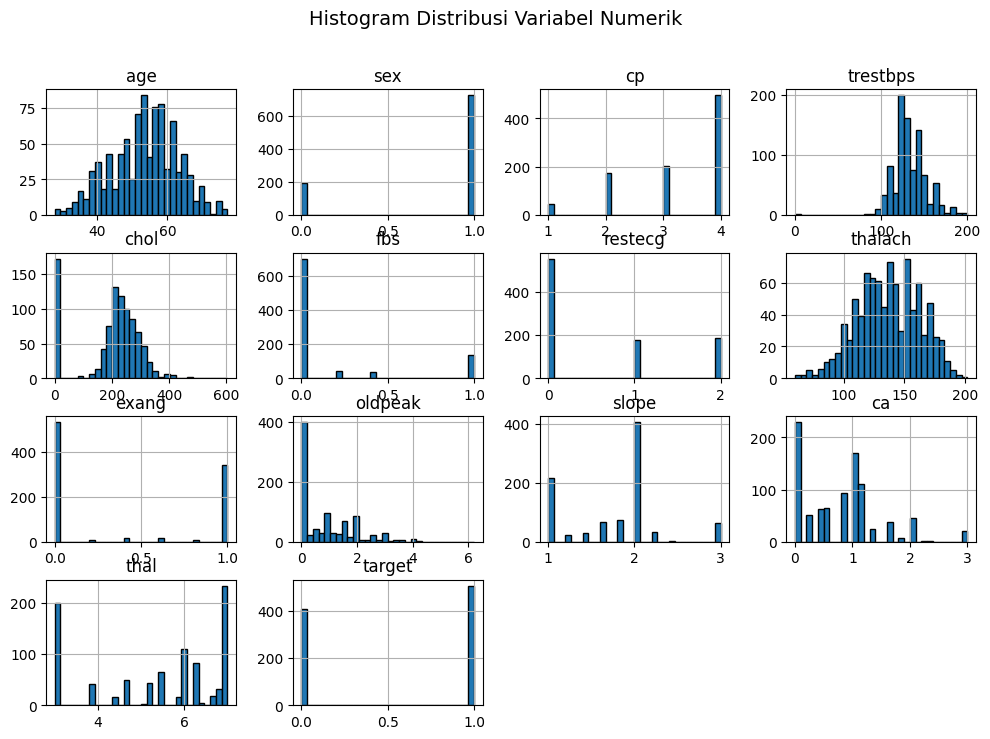

In [34]:
numeric_data =df.select_dtypes(include=['float64', 'int64'])
numeric_data.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histogram Distribusi Variabel Numerik", fontsize=14)
plt.show()

Berdasarkan output histogram dari masing masing variabel kita bisa mendapatkan beberapa informasi diantaranya


*   Kita sudah memiliki label "target" untuk menandakan penyakit pasien dengan angka 0 yang artinya tidak memiliki penyakit jantung dan 1 yang artinya memuliki penyakit jantung
*   Mayoritas data numerik menunjukkan distribusi yang mendekati normal
* Terdapat beberapa variabel yang menunjukkan distribusi miring kanan sehingga kemungkinan akan berimplikasi pada model yang telah dibuat



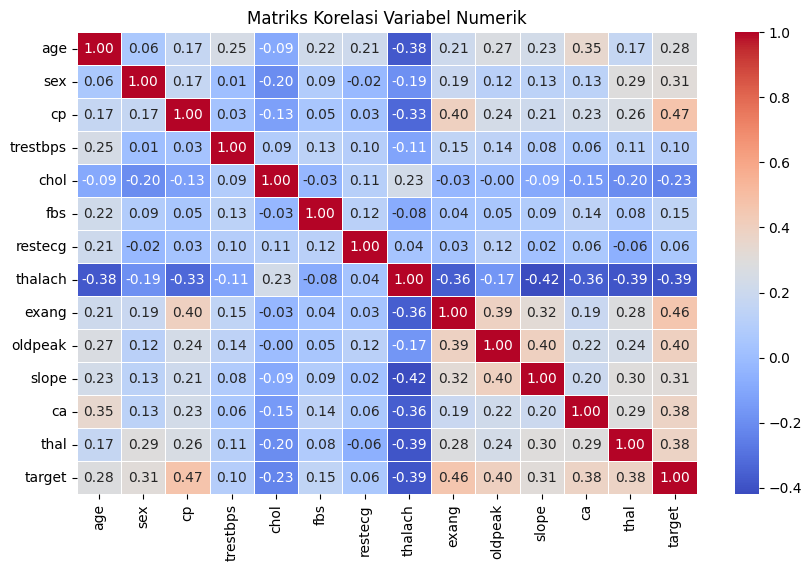

In [35]:
# Analisis Korelasi
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_data.corr().round(2)

# Heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

Hasil Correlation Map diatas beberikan beberapa informasi yaitu


*   Fitur yang sangat berkorelasi dengan label target adalah cp (nyeri dada), exang (nyeri dada saat berolahraga), oldpeak, thal (hasil tes thalassemia) dan ca (jumlah pembuluh darah)
*   Pada hasil tersebut dapat dilihat bahwa jenis kelamin laki laki (sex=1) memiliki resiko penyakit jantung yang lebih tinggi dibandingkan perempuan



## Data Preparation

#### Handling Duplicate Data

Sebagaimana setelah melakukan pengecekan data dapat kita lihat bahwa ada 2 data yang mengalami duplikasi sehingga diperlukan adanya penghapusan data duplikat menggunakan fungsi `.drop_duplicates()`

In [36]:
# Hapus duplikasi data
df = df.drop_duplicates()

print(f"Jumlah duplikasi data setelah dihapus: {df.duplicated().sum()}")

# Cek ukuran data setelah menghapus duplikasi
print(f"Jumlah baris data setelah menghapus duplikasi: {len(df)}")

Jumlah duplikasi data setelah dihapus: 0
Jumlah baris data setelah menghapus duplikasi: 918


Berikutnya saya akan menghapus kolom source yang berisi nama RS data penyakit ini diambil, alasannya karena fokus saya disini hanya untuk kebutuhan analisis diagnosis

In [37]:
df = df.drop('source', axis=1)

#### Handling Outlier


--- TRESTBPS ---
Outlier yang diganti: 28
Nilai pengganti (median): 130.00

--- CHOL ---
Outlier yang diganti: 185
Nilai pengganti (median): 223.00

=== PERBANDINGAN HASIL ===

Statistik deskriptif SEBELUM penanganan outlier:
         trestbps        chol
count  918.000000  918.000000
mean   132.273420  199.577124
std     18.565609  109.349643
min      0.000000    0.000000
25%    120.000000  177.000000
50%    130.000000  223.000000
75%    140.000000  267.000000
max    200.000000  603.000000

Statistik deskriptif SETELAH penanganan outlier:
         trestbps        chol
count  918.000000  918.000000
mean   130.956427  237.822222
std     15.647882   44.933275
min     92.000000   80.600000
25%    120.000000  216.000000
50%    130.000000  223.000000
75%    140.000000  264.000000
max    170.000000  394.000000


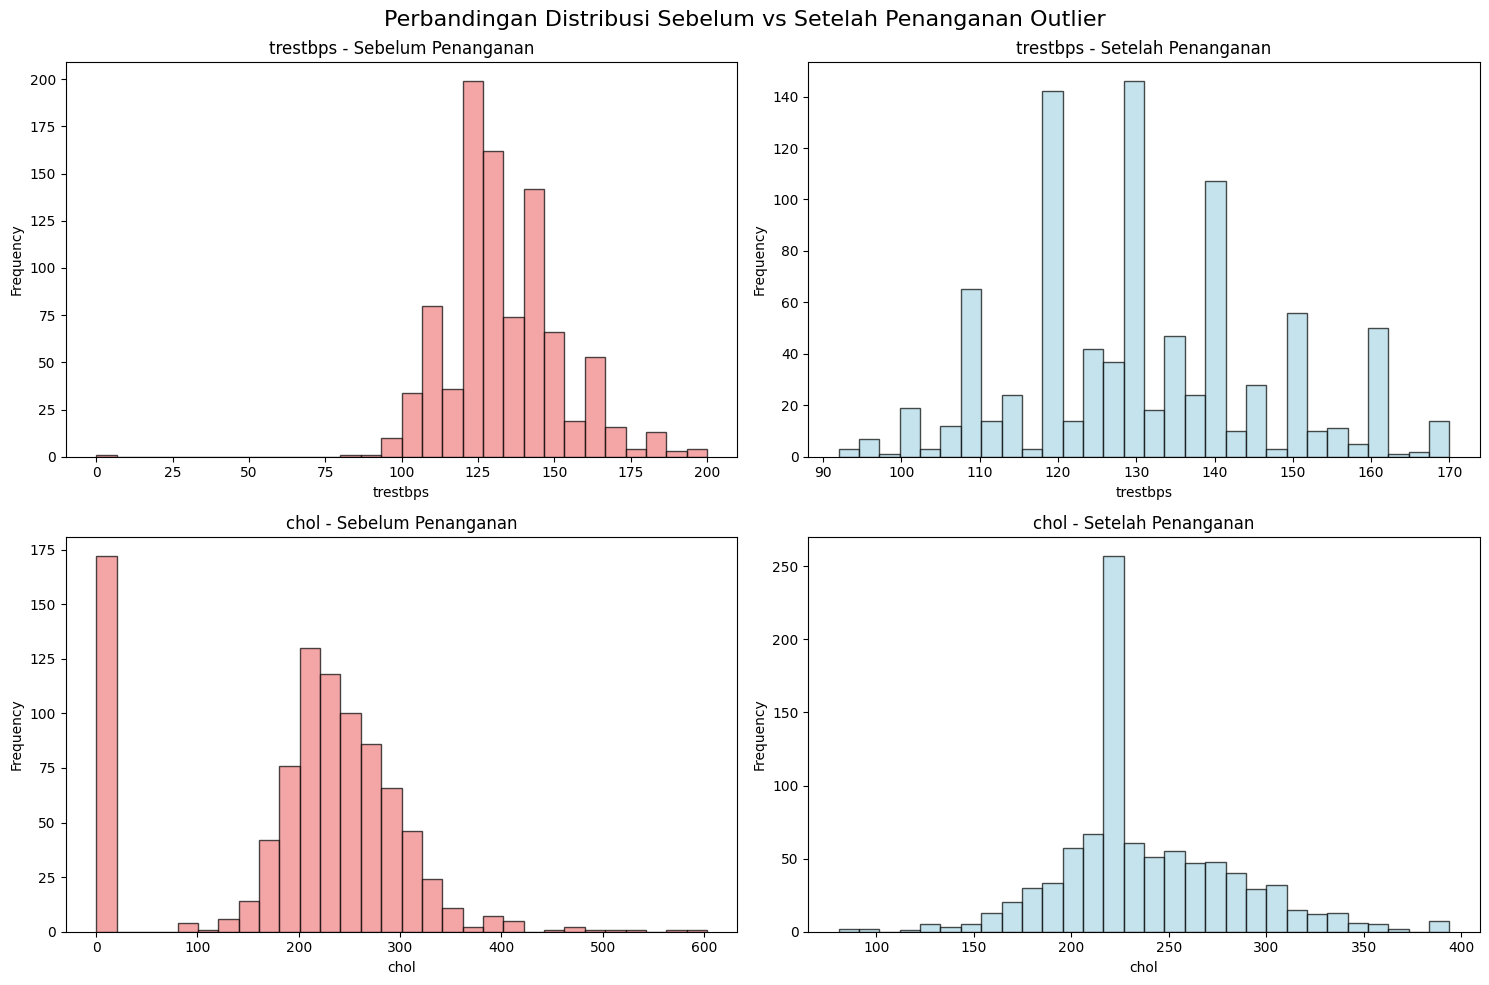

In [38]:
# Buat copy dataframe untuk membandingkan sebelum dan sesudah
df_before = df.copy()

for col in outlier_cols:
    # Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung median kolom
    median_val = df[col].median()

    # Hitung jumlah outlier sebelum penanganan
    outliers_before = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

    # Ganti outlier dengan median
    df[col] = df[col].apply(lambda x: median_val if x < lower_bound or x > upper_bound else x)

    print(f"\n--- {col.upper()} ---")
    print(f"Outlier yang diganti: {outliers_before}")
    print(f"Nilai pengganti (median): {median_val:.2f}")

print("\n=== PERBANDINGAN HASIL ===")
print("\nStatistik deskriptif SEBELUM penanganan outlier:")
print(df_before[outlier_cols].describe())

print("\nStatistik deskriptif SETELAH penanganan outlier:")
print(df[outlier_cols].describe())

# Visualisasi perbandingan sebelum dan setelah penanganan outlier
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Perbandingan Distribusi Sebelum vs Setelah Penanganan Outlier", fontsize=16)

for i, col in enumerate(outlier_cols):
    # Sebelum penanganan
    axes[i, 0].hist(df_before[col], bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
    axes[i, 0].set_title(f'{col} - Sebelum Penanganan')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Setelah penanganan
    axes[i, 1].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='lightblue')
    axes[i, 1].set_title(f'{col} - Setelah Penanganan')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Bagi pengelompokan jenis data

pada tahapan ini saya mengecek tipe data terhadap kolom yang akan di gunakan untuk permodelan, disini saya menggunakan `df.select_dtypes(include=['number']).columns.tolist()` dan `df.select_dtypes(include=['object']).columns.tolist()`. dapat dilihat pada output dibawah kode tersebut apa saja kolom dengan tipe data numerik. dan untuk kolom kategorikal kosong karena pada dataset memang hanya membutuhkan kolom numerikal untuk proses

In [39]:
# Mengecek tipe data setiap kolom dan mengelompokkannya
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Kolom Numerikal:")
print(numerical_cols)
print("\nKolom Kategorikal:")
categorical_cols

Kolom Numerikal:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Kolom Kategorikal:


[]

#### Split Data

Tahapan ini merupakan tahapan sebelum memasuki permodelan. Langkah yang saya lakukan diantaranya :
* Karena data yang saya gunakan disini sudah berformat numerik dan sudah terdapat label pada data maka saya tidak melakukan Label Encoding.
* Disini saya membagi dataset menjadi data latih (train) sebesar 80% dan data uji (testing) sebesar 20%

In [40]:
# Bagi dataset menjadi training (80%) dan testing (20%)
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek ukuran data
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (734, 13), Testing set: (184, 13)


Langkah kedua pada tahapan ini saya melakukan normalisasi menggunakan `StandardScaler()` dengan tujuan meningkatkan hasil prediksi lebih akurat dan stabil



#### Normalisasi Data

In [41]:
# normalisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Langkah berikutnya saya membuat kolom label kategorikal untuk identifikasi prediksi penyakit jantung

In [42]:
# Mapping nilai target ke label
df['target_label'] = df['target'].map({1: 'Mengidap Penyakit Jantung', 0: 'Tidak Mengidap Penyakit Jantung'})

# Menampilkan jumlah data berdasarkan label target
df['target_label'].value_counts()

,count
target_label,
Mengidap Penyakit Jantung,508
Tidak Mengidap Penyakit Jantung,410


<ipython-input-43-549dd4452f3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_label', data=df, palette='viridis')


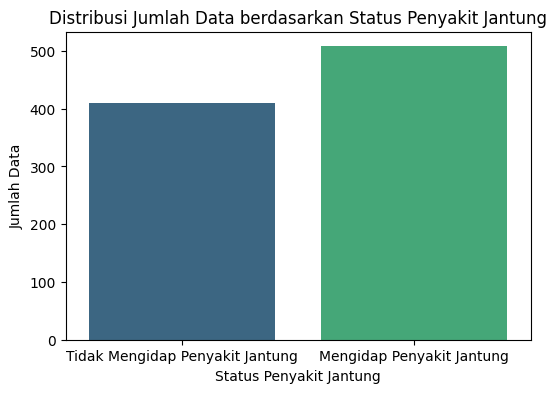

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='target_label', data=df, palette='viridis')
plt.title('Distribusi Jumlah Data berdasarkan Status Penyakit Jantung')
plt.xlabel('Status Penyakit Jantung')
plt.ylabel('Jumlah Data')
plt.show()

## Model Development

Pada tahap ini, tiga algoritma machine learning diimplementasikan untuk menyelesaikan masalah klasifikasi, yaitu Random Forest, Logistic Regression, dan K-Nearest Neighbors (KNN). Setiap model dievaluasi menggunakan metrik akurasi dan F1-Score untuk menentukan performa terbaik.

### Random Forest

**Cara Kerja**

Random Forest adalah algoritma ensemble learning yang menggabungkan multiple decision trees untuk membuat prediksi yang lebih akurat dan stabil. Algoritma ini bekerja dengan cara:

* Bootstrap Sampling: Membuat beberapa subset data training secara random dengan replacement
* Feature Randomness: Pada setiap node split, hanya subset random dari features yang dipertimbangkan
* Tree Construction: Membangun decision tree untuk setiap subset data
* Voting Mechanism: Untuk klasifikasi, menggunakan majority voting dari semua trees

**Parameter**
Berdasarkan implementasi yang ditunjukkan, Random Forest menggunakan parameter default dari scikit-learn:

* `random_state=42`: Seed untuk reproducibility dan konsistensi hasil
* ` n_estimators=100`: Jumlah decision trees dalam forest (default dari model)
* `max_depth=None:` Kedalaman maksimum tree (default dari model)
* `min_samples_split=2`: Minimum sampel untuk split internal node (default dari model)
* `min_samples_leaf=1`: Minimum sampel pada leaf node
random_state=None: Seed untuk reproducibility (default dari model)

In [44]:
from sklearn.ensemble import RandomForestClassifier
# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = rf_model.predict(X_test)

### Logistic Regression

**Cara Kerja**

Logistic Regression adalah algoritma linear classifier yang menggunakan fungsi logistic (sigmoid) untuk memetakan nilai real ke probabilitas antara 0 dan 1. Cara kerja algoritma:

* Linear Combination: Menghitung kombinasi linear dari input features: z = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ
* Sigmoid Function: Mengaplikasikan fungsi sigmoid: σ(z) = 1/(1 + e^(-z))
* Probability Mapping: Mengkonversi output ke probabilitas kelas
* Decision Boundary: Menggunakan threshold (biasanya 0.5) untuk klasifikasi final

**Parameter**

Menggunakan parameter default dari scikit-learn:

* `solver='lbfgs'`: Algoritma optimisasi Limited-memory BFGS
* `max_iter=100`: Maksimum iterasi untuk konvergensi
* C=1.0: Inverse regularization strength
* `penalty='l2'`: L2 regularization
* `random_state=42`: Seed untuk reproducibility dan konsistensi hasil

In [45]:
from sklearn.linear_model import LogisticRegression
# Inisialisasi dan latih model Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test)

### K-Nearest Neighbors

**Cara Kerja**

KNN adalah algoritma lazy learning yang melakukan klasifikasi berdasarkan kedekatan dengan data training. Proses kerja algoritma:

* Distance Calculation: Menghitung jarak antara data test dengan semua data training
* Neighbor Selection: Memilih k tetangga terdekat berdasarkan jarak yang dihitung
* Majority Voting: Menggunakan voting mayoritas dari k tetangga untuk menentukan kelas
* Tie Breaking: Menangani kasus seri dengan aturan tertentu


**Parameter**

Menggunakan parameter default dari scikit-learn:
* `n_neighbors=5`: Jumlah tetangga terdekat yang dipertimbangkan (default)
* `weights='uniform'`: Semua tetangga memiliki bobot yang sama (default)
*` algorithm='auto'`: Otomatis memilih algoritma terbaik (ball_tree, kd_tree, atau brute) (default)
* `metric='minkowski'`: Metrik jarak yang digunakan (default)
* `p=2`: Parameter untuk Minkowski distance (Euclidean distance) (default)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
# Inisialisasi dan latih model KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test)

## Evaluation

Evaluasi model yang dilakukan untuk prediksi data ini menggunakan metrik Akurasi dan F1-Score.

Berdasarkan hasil analisis yang didapatkan dari ketiga model tersebut masing masing model memiliki akurasi serta F1 score yang tinggi dan sangat baik dalam memprediksi dataset perbedaan dan penjelasan untuk masing masing permodelan, dari semua proses yang didapatkan terdapat beberapa kesimpulan diantaranya :     

1. Random Forest
* Akurasi dan F1-Score stabil di angka 0.81
*  Memprediksi pasien yang tidak sakit sebagai sakit (false positive)

2. Logistic Regression
* Memiliki akurasi dan F1-score tertinggi di angka 0.83
* Model yang memprediksi paling baik karena memiliki recall di angka 0.87

3. KNN
* Akurasi dan F1-Score di angka yang cukup bagus yaitu 0.82 dan F1 Score 0.81
* Recall yang tinggi sehingga bagus untuk melakukan prediksi

Random Forest

In [47]:
# Evaluasi Model Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
rf_report = classification_report(y_test, rf_y_pred, zero_division=1)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

print("\n=== Random Forest ===")
print(f'Accuracy: {rf_accuracy}')
print(f'Weighted F1-Score: {rf_f1}')
print('Classification Report:\n', rf_report)


=== Random Forest ===
Accuracy: 0.8369565217391305
Weighted F1-Score: 0.8364862040133779
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        82
           1       0.84      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



Logistic Regression

In [48]:
# Evaluasi Model Logistic Regression
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')
lr_report = classification_report(y_test, lr_y_pred, zero_division=1)
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)

print("\n=== Logistic Regression ===")
print(f'Accuracy: {lr_accuracy}')
print(f'Weighted F1-Score: {lr_f1}')
print('Classification Report:\n', lr_report)


=== Logistic Regression ===
Accuracy: 0.8315217391304348
Weighted F1-Score: 0.8308880000732685
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        82
           1       0.83      0.87      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



K-Nearest Neighbours

In [49]:
# Evaluasi Model KNN
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
knn_report = classification_report(y_test, knn_y_pred, zero_division=1)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

print("=== KNN ===")
print(f'Accuracy: {knn_accuracy}')
print(f'Weighted F1-Score: {knn_f1}')
print('Classification Report:\n', knn_report)

=== KNN ===
Accuracy: 0.8152173913043478
Weighted F1-Score: 0.814684364548495
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79        82
           1       0.82      0.85      0.84       102

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.82      0.81       184



Barplot Accuracy dan F1 Score


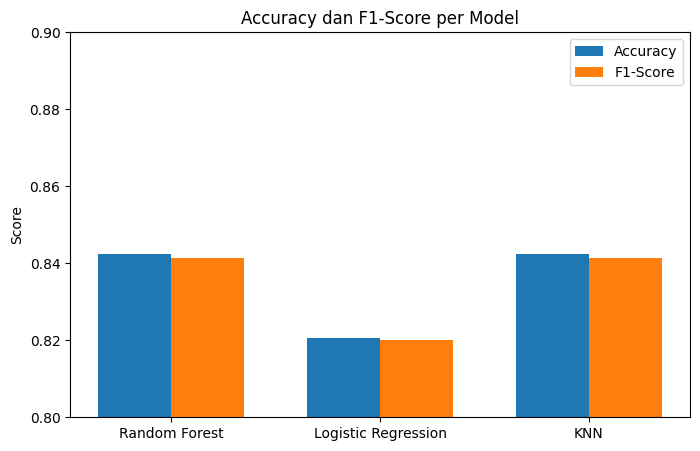

In [50]:
import numpy as np

models = ['Random Forest', 'Logistic Regression', 'KNN']
accuracies = [0.8424, 0.8207, 0.8424]
f1_scores = [0.8415, 0.8200, 0.8415]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, accuracies, width, label='Accuracy')
ax.bar(x + width/2, f1_scores, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title('Accuracy dan F1-Score per Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.ylim(0.8, 0.9)
plt.show()


Confussion Matrix

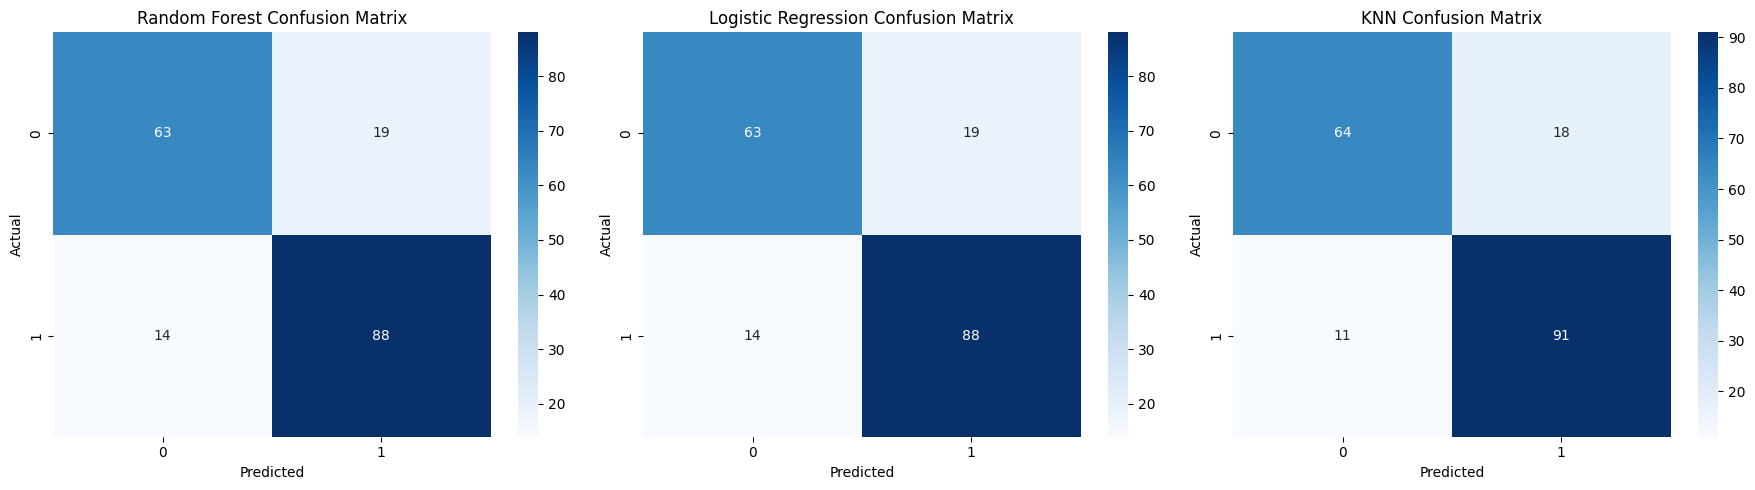

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix untuk masing-masing model
cm_rf = [[63, 19], [14, 88]]
cm_lr = [[63, 19], [14, 88]]
cm_knn = [[64, 18], [11, 91]]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (cm, title) in enumerate(zip([cm_rf, cm_lr, cm_knn],
                                    ['Random Forest', 'Logistic Regression', 'KNN'])):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{title} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Hasil dari Confusion Matrix diatas memberikan beberapa pemaparan diantaranya
1. Random Forest & Logistic Regression
Keduanya memiliki jumlah prediksi yang sama persis yaitu
* 88 pasien sakit terdeteksi dengan benar (TP)
* 63 pasien sehat terdeteksi dengan benar (TN)
* 14 pasien sakit tidak terdeteksi (FN)
* 19 pasien sehat diidentifikasi sakit (FP)

2. K-Nearest Neighbors (KNN)
* TP meningkat menjadi 91 (berhasil mendeteksi 3 pasien sakit lebih banyak).
* FP sedikit berkurang dari 19 menjadi 18.

## Evaluation: Model Performance vs Business Understanding

### Hubungan dengan Problem Statements

1. **Bagaimana cara mengembangkan model machine learning yang dapat memprediksi risiko penyakit jantung?**  
   Problem berhasil dijawab melalui pengembangan dan evaluasi tiga model klasifikasi:
   - **Random Forest** mencapai akurasi 84% dan F1-score 0.84
   - **Logistic Regression** akurasi 83% dan F1-score 0.83
   - **K-Nearest Neighbors (KNN)** akurasi 82% dan F1-score 0.81

   Ketiganya menunjukkan performa yang baik, dan proses mencakup:
   - Praproses data secara menyeluruh
   - Pemilihan algoritma yang relevan
   - Evaluasi metrik klasifikasi (precision, recall, F1-score)
   - Analisis Confusion Matrix untuk interpretasi prediksi model

2. **Faktor-faktor apa saja yang paling berkorelasi dengan penyakit jantung?**  
   Telah dijawab melalui:
   - Analisis korelasi antar fitur
   - Visualisasi distribusi data
   - Feature importance dari Random Forest yang mengidentifikasi fitur-fitur dominan dalam prediksi penyakit jantung

### Capaian Goals

1. **Model prediksi risiko penyakit jantung**  
   Tercapai. Model Random Forest menjadi pilihan terbaik dari sisi akurasi dan F1-score. Logistic Regression menjadi alternatif baik karena recall yang tinggi dan interpretabilitas.

2. **Identifikasi faktor risiko penyakit jantung**  
   Tercapai. Insight dari EDA dan analisis fitur menunjukkan keterkaitan kuat antara faktor medis (seperti chol, cp, thalach, dan age) dengan risiko penyakit jantung.

### Dampak dari Solusi yang Dirancang

- **Evaluasi multi-model** memberikan dasar kuat untuk pemilihan model terbaik
- **Random Forest** unggul dari sisi akurasi dan generalisasi
- **Logistic Regression** menunjukkan recall tinggi (0.87), ideal untuk aplikasi medis di mana deteksi positif lebih diutamakan
- **KNN** menunjukkan peningkatan pada TP (91 pasien berhasil dideteksi) dan pengurangan FP dibanding model lainnya

### Insight dari Confusion Matrix

- **Random Forest & Logistic Regression**:
  - 88 pasien sakit terdeteksi dengan benar (True Positive)
  - 63 pasien sehat terdeteksi dengan benar (True Negative)
  - 14 pasien sakit tidak terdeteksi (False Negative)
  - 19 pasien sehat salah diklasifikasikan sebagai sakit (False Positive)

- **KNN**:
  - TP meningkat menjadi 91, artinya mendeteksi 3 pasien sakit lebih banyak
  - FP menurun dari 19 menjadi 18, sehingga kesalahan identifikasi pasien sehat juga berkurang

### Kesimpulan

Model yang dikembangkan telah berhasil menjawab seluruh problem statement dan mencapai goals yang ditetapkan. Dari keseluruhan model, **Random Forest** merupakan model terbaik untuk diterapkan pada dataset ini karena memiliki akurasi dan F1-Score tertinggi, yaitu Accuracy sebesar **0.8369** dan F1-Score sebesar **0.8364**.

Namun, jika dilihat dari hasil **Confusion Matrix**, model **K-Nearest Neighbors (KNN)** dapat dipertimbangkan karena mampu meminimalkan jumlah **False Negative**, yaitu kasus ketika pasien sakit tidak terdeteksi. Hal ini penting dalam konteks medis untuk mengurangi risiko kelalaian dalam mendeteksi pasien yang benar-benar sakit.

Secara keseluruhan, evaluasi menunjukkan bahwa solusi yang diimplementasikan berdampak positif terhadap kualitas prediksi dan akurasi sistem deteksi dini penyakit jantung, serta layak digunakan sebagai alat bantu dalam proses **screening awal** di bidang medis.
